# Deutsch-Jozsa Algorithm

f(x) is a boolean function that is guaranted to be either constant (ouputs 1  for all possible inputs) or balanced (outputs 0 for exactly half the inputs and 1 for the other half).\
Given a quantum oracle that implements f, Deutsch-Jozsa algorithm determines if such a function is balanced or constant.

### Necessary Imports and Definitions

In [8]:
import numpy as np
from math import sqrt
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister, execute, Aer, IBMQ
from qiskit.visualization import plot_histogram, plot_bloch_multivector
from qiskit.extensions import Initialize
from qiskit_textbook.tools import random_state, array_to_latex

unitary_backend = Aer.get_backend("unitary_simulator")
statevector_backend = Aer.get_backend("statevector_simulator")
backend = Aer.get_backend("qasm_simulator")

## Oracle Function

In [2]:
def get_oracle(oracle_type, n):
    """
    Makes a quantum circuit of the type "oracle_type" that can either
    be "constant" or "balanced" with n + 1 qubits (n inputs and 1 output qubit)
    Returns a gate that is to be used as a oracle
    """
    
    # We have a circuit with n inputs and 1 output
    oracle = QuantumCircuit(n + 1)
    
    if oracle_type == "balanced":
        b = np.random.randint(1, 2**n)
        b_str = format(b, '0'+str(n)+'b')
        
        # apply X gates where we find a 1 in our binary string
        for q in range(len(b_str)):
            if b_str[q] == '1':
                oracle.x(q)
        # apply CNOT for each qubit to the output qubit
        for q in range(n):
            oracle.cx(q, n)
            
        # place another round of X gates
        for q in range(len(b_str)):
            if b_str[q] == '1':
                oracle.x(q)
    elif oracle_type == "constant":
        rand = np.random.randint(2)
        if rand == 1:
            oracle.x(n)
    oracle_gate = oracle.to_gate()
    oracle_gate.name = "Oracle"
    return oracle_gate
        

## Deutsch-Jozsa Algorithm

In [15]:
def dj_circuit(oracle_gate, n):
    """
    Applies the deutsch-jozsa algorithm on the given oracle
    Returns the resulting circuit
    """
    
    circuit = QuantumCircuit(n+1, n)
    
    for qubit in range(n):
        circuit.h(qubit)
    
    circuit.x(n)
    circuit.h(n)
    
    circuit.append(oracle_gate, range(n+1))
    
    
    for qubit in range(n):
        circuit.h(qubit)
    
    for i in range(n):
        circuit.measure(i, i)
    
    
    
    return circuit

## Test the algorithm

### *Balanced Case*

In [16]:
n = 4
oracle_gate = get_oracle('balanced', n)
qc = dj_circuit(oracle_gate, n)
qc.draw()

┌───┐     ┌─────────┐┌───┐┌─┐         
q_0: ┤ H ├─────┤0        ├┤ H ├┤M├─────────
     ├───┤     │         │├───┤└╥┘┌─┐      
q_1: ┤ H ├─────┤1        ├┤ H ├─╫─┤M├──────
     ├───┤     │         │├───┤ ║ └╥┘┌─┐   
q_2: ┤ H ├─────┤2 Oracle ├┤ H ├─╫──╫─┤M├───
     ├───┤     │         │├───┤ ║  ║ └╥┘┌─┐
q_3: ┤ H ├─────┤3        ├┤ H ├─╫──╫──╫─┤M├
     ├───┤┌───┐│         │└───┘ ║  ║  ║ └╥┘
q_4: ┤ X ├┤ H ├┤4        ├──────╫──╫──╫──╫─
     └───┘└───┘└─────────┘      ║  ║  ║  ║ 
c: 4/═══════════════════════════╩══╩══╩══╩═
                                0  1  2  3

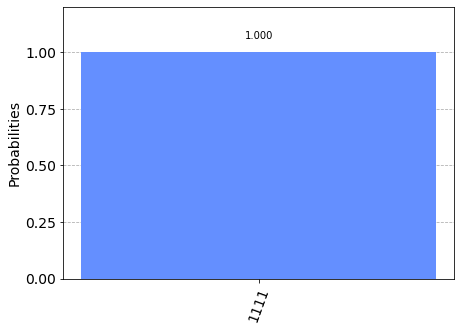

In [17]:
results = execute(qc, backend=backend, shots=1024).result()
answer = results.get_counts()
plot_histogram(answer)

### *Constant Case*

In [19]:
n = 4
oracle_gate = get_oracle('constant', n)
qc = dj_circuit(oracle_gate, n)
qc.draw()

┌───┐     ┌─────────┐┌───┐┌─┐         
q_0: ┤ H ├─────┤0        ├┤ H ├┤M├─────────
     ├───┤     │         │├───┤└╥┘┌─┐      
q_1: ┤ H ├─────┤1        ├┤ H ├─╫─┤M├──────
     ├───┤     │         │├───┤ ║ └╥┘┌─┐   
q_2: ┤ H ├─────┤2 Oracle ├┤ H ├─╫──╫─┤M├───
     ├───┤     │         │├───┤ ║  ║ └╥┘┌─┐
q_3: ┤ H ├─────┤3        ├┤ H ├─╫──╫──╫─┤M├
     ├───┤┌───┐│         │└───┘ ║  ║  ║ └╥┘
q_4: ┤ X ├┤ H ├┤4        ├──────╫──╫──╫──╫─
     └───┘└───┘└─────────┘      ║  ║  ║  ║ 
c: 4/═══════════════════════════╩══╩══╩══╩═
                                0  1  2  3

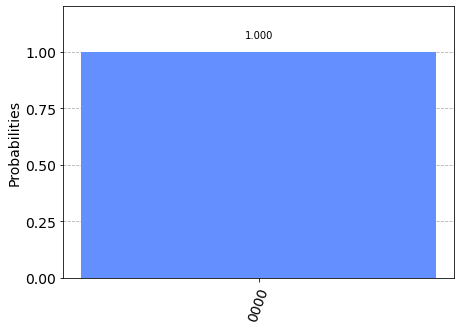

In [20]:
results = execute(qc, backend=backend, shots=1024).result()
answer = results.get_counts()
plot_histogram(answer)